<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/noah_aidan_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [32]:
df <- read_csv('ufc.csv') %>% filter(!is.na(HeightDif) & !is.na(ReachDif) & !is.na(SigStrDif) &
  HeightDif > -100 & ReachDif > -100)

Rows: 13056 Columns: 118
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (13): RedFighter, BlueFighter, Date, Location, Country, Winner, Weight...
dbl  (102): RedOdds, BlueOdds, RedExpectedValue, BlueExpectedValue, NumberOf...
lgl    (2): TitleBout, BWFeatherweightRank
time   (1): FinishRoundTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Is there an association between the height differential in a UFC bout and the significant strike differential?

In [33]:
df

RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,⋯,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alexandre Pantoja,Kai Asakura,-250,215,40.0000,215.0000,12/7/2024,"Las Vegas, Nevada, USA",USA,Red,⋯,Rear Naked Choke,2,02:05:00,425,300,800,150,2500,400,350
Shavkat Rakhmonov,Ian Machado Garry,-210,295,47.6190,295.0000,12/7/2024,"Las Vegas, Nevada, USA",USA,Red,⋯,NA,5,05:00:00,1500,250,650,180,3000,240,700
Ciryl Gane,Alexander Volkov,-380,300,26.3158,300.0000,12/7/2024,"Las Vegas, Nevada, USA",USA,Red,⋯,NA,3,05:00:00,900,-160,450,1100,3000,350,1100
Bryce Mitchell,Kron Gracie,-950,625,10.5263,625.0000,12/7/2024,"Las Vegas, Nevada, USA",USA,Red,⋯,Elbows,3,00:39:00,639,-200,1100,380,1400,500,4000
Nate Landwehr,Dooho Choi,-130,110,76.9231,110.0000,12/7/2024,"Las Vegas, Nevada, USA",USA,Blue,⋯,Elbows,3,03:21:00,801,275,550,500,700,300,250
Dominick Reyes,Anthony Smith,-380,300,26.3158,300.0000,12/7/2024,"Las Vegas, Nevada, USA",USA,Red,⋯,Punches,2,04:46:00,586,250,750,1200,1200,-125,800
Vicente Luque,Themba Gorimbo,-650,-162,15.3846,61.7284,12/7/2024,"Las Vegas, Nevada, USA",USA,Red,⋯,Anaconda Choke,1,00:52:00,52,450,130,450,900,600,450
Movsar Evloev,Aljamain Sterling,-238,195,42.0168,195.0000,12/7/2024,"Las Vegas, Nevada, USA",USA,Red,⋯,NA,3,05:00:00,900,-135,275,1600,1100,550,1600
Randy Brown,Bryan Battle,150,-180,150.0000,55.5556,12/7/2024,"Las Vegas, Nevada, USA",USA,Blue,⋯,NA,3,05:00:00,900,400,185,1000,550,450,300


In [34]:
df %>% colnames

[1] "RedFighter"                  "BlueFighter"                
  [3] "RedOdds"                     "BlueOdds"                   
  [5] "RedExpectedValue"            "BlueExpectedValue"          
  [7] "Date"                        "Location"                   
  [9] "Country"                     "Winner"                     
 [11] "TitleBout"                   "WeightClass"                
 [13] "Gender"                      "NumberOfRounds"             
 [15] "BlueCurrentLoseStreak"       "BlueCurrentWinStreak"       
 [17] "BlueDraws"                   "BlueAvgSigStrLanded"        
 [19] "BlueAvgSigStrPct"            "BlueAvgSubAtt"              
 [21] "BlueAvgTDLanded"             "BlueAvgTDPct"               
 [23] "BlueLongestWinStreak"        "BlueLosses"                 
 [25] "BlueTotalRoundsFought"       "BlueTotalTitleBouts"        
 [27] "BlueWinsByDecisionMajority"  "BlueWinsByDecisionSplit"    
 [29] "BlueWinsByDecisionUnanimous" "BlueWinsByKO"               
 [31] "BlueWinsBySubmission"        "BlueWinsByTKODoctorStoppage"
 [33] "BlueWins"                    "BlueStance"                 
 [35] "BlueHeightCms"               "BlueReachCms"               
 [37] "BlueWeightLbs"               "RedCurrentLoseStreak"       
 [39] "RedCurrentWinStreak"         "RedDraws"                   
 [41] "RedAvgSigStrLanded"          "RedAvgSigStrPct"            
 [43] "RedAvgSubAtt"                "RedAvgTDLanded"             
 [45] "RedAvgTDPct"                 "RedLongestWinStreak"        
 [47] "RedLosses"                   "RedTotalRoundsFought"       
 [49] "RedTotalTitleBouts"          "RedWinsByDecisionMajority"  
 [51] "RedWinsByDecisionSplit"      "RedWinsByDecisionUnanimous" 
 [53] "RedWinsByKO"                 "RedWinsBySubmission"        
 [55] "RedWinsByTKODoctorStoppage"  "RedWins"                    
 [57] "TotalStance"                 "RedHeightCms"               
 [59] "TotalReach"                  "RedWeightLbs"               
 [61] "RedAge"                      "BlueAge"                    
 [63] "LoseStreakDif"               "WinStreakDif"               
 [65] "LongestWinStreakDif"         "WinDif"                     
 [67] "LossDif"                     "TotalRoundDif"              
 [69] "TotalTitleBoutDif"           "KODif"                      
 [71] "SubDif"                      "HeightDif"                  
 [73] "ReachDif"                    "AgeDif"                     
 [75] "SigStrDif"                   "AvgSubAttDif"               
 [77] "AvgTDDif"                    "EmptyArena"                 
 [79] "BMatchWCRank"                "RMatchWCRank"               
 [81] "RWFlyweightRank"             "RWFeatherweightRank"        
 [83] "RWStrawweightRank"           "RWBantamweightRank"         
 [85] "RHeavyweightRank"            "RLightHeavyweightRank"      
 [87] "RMiddleweightRank"           "RWelterweightRank"          
 [89] "RLightweightRank"            "RFeatherweightRank"         
 [91] "RBantamweightRank"           "RFlyweightRank"             
 [93] "RPFPRank"                    "BWFlyweightRank"            
 [95] "BWFeatherweightRank"         "BWStrawweightRank"          
 [97] "BWBantamweightRank"          "BHeavyweightRank"           
 [99] "BLightHeavyweightRank"       "BMiddleweightRank"          
[101] "BWelterweightRank"           "BLightweightRank"           
[103] "BFeatherweightRank"          "BBantamweightRank"          
[105] "BFlyweightRank"              "BPFPRank"                   
[107] "BetterRank"                  "Finish"                     
[109] "FinishDetails"               "FinishRound"                
[111] "FinishRoundTime"             "TotalFightTimeSecs"         
[113] "RedDecOdds"                  "BlueDecOdds"                
[115] "RSubOdds"                    "BSubOdds"                   
[117] "RKOOdds"                     "BKOOdds"

# Differentials are calculated Blue - Red Fighters

In [44]:
df_spec <- df %>% select(SigStrDif, ReachDif, HeightDif, Winner)

In [45]:
summary(df_spec)

   SigStrDif            ReachDif          HeightDif            Winner         
 Min.   :-118.0000   Min.   :-33.0200   Min.   :-33.02000   Length:6525       
 1st Qu.:  -7.9167   1st Qu.: -5.0800   1st Qu.: -5.08000   Class :character  
 Median :  -0.3095   Median :  0.0000   Median :  0.00000   Mode  :character  
 Mean   :  -2.6657   Mean   : -0.2173   Mean   :  0.02485                     
 3rd Qu.:   2.1000   3rd Qu.:  5.0800   3rd Qu.:  5.08000                     
 Max.   : 128.2222   Max.   : 30.4800   Max.   : 30.48000                     

In [50]:
sd(df_spec$HeightDif)
sd(df_spec$ReachDif)
sd(df_spec$SigStrDif)

[1] 6.357242

[1] 8.290133

[1] 19.58747

In [51]:
df_spec %>% count(Winner)

Winner,n
<chr>,<int>
Blue,2741
Red,3784


In [53]:
length(df_spec$HeightDif)

[1] 6525

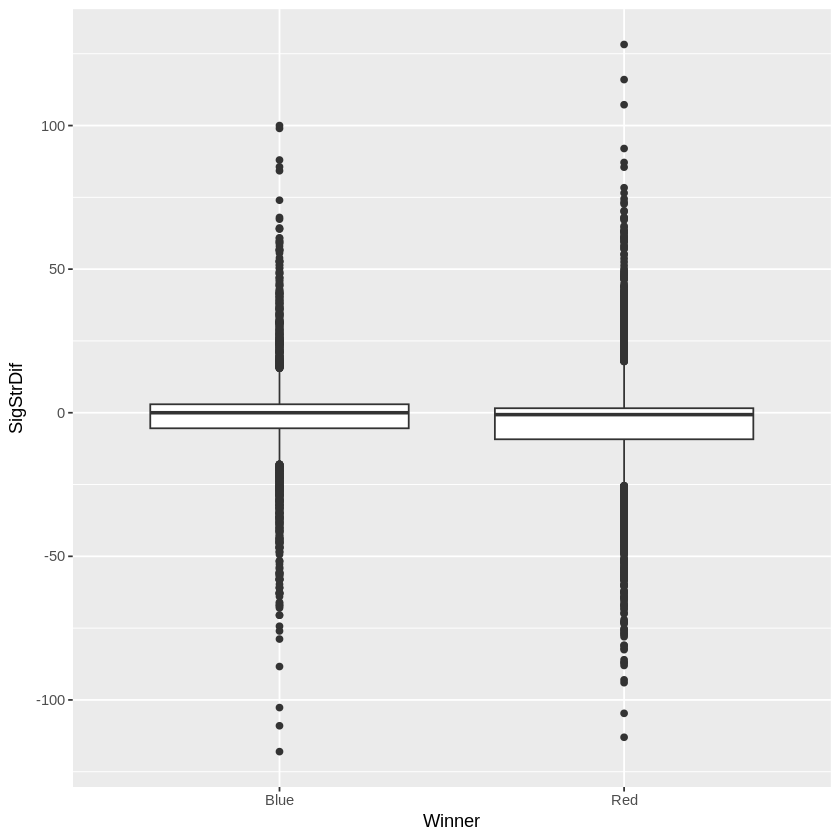

In [36]:
df_spec %>% ggplot(aes(x=Winner, y=SigStrDif)) + geom_boxplot()

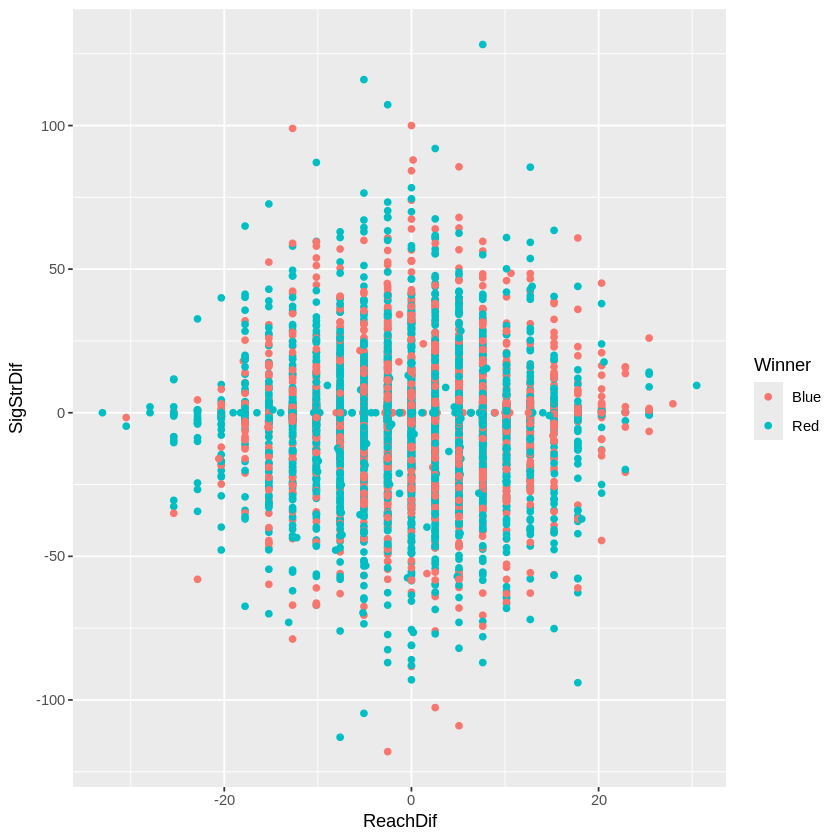

In [37]:
df_spec %>% ggplot(aes(x=ReachDif, y=SigStrDif, color=Winner)) + geom_point()

In [38]:
model1 <- lm(SigStrDif ~ ReachDif, data=df_spec)
summary(model1)


Call:
lm(formula = SigStrDif ~ ReachDif, data = df_spec)

Residuals:
     Min       1Q   Median       3Q      Max 
-115.420   -5.146    2.274    4.800  131.176 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.67369    0.24256 -11.023   <2e-16 ***
ReachDif    -0.03671    0.02925  -1.255     0.21    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.59 on 6523 degrees of freedom
Multiple R-squared:  0.0002413,	Adjusted R-squared:  8.807e-05 
F-statistic: 1.575 on 1 and 6523 DF,  p-value: 0.2096


In [39]:
model1 <- lm(SigStrDif ~ ReachDif + AgeDif, data=df_spec)
summary(model1)


Call:
lm(formula = SigStrDif ~ ReachDif + AgeDif, data = df_spec)

Residuals:
     Min       1Q   Median       3Q      Max 
-115.428   -5.155    2.274    4.799  131.174 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.673974   0.242629 -11.021   <2e-16 ***
ReachDif    -0.036850   0.029364  -1.255    0.210    
AgeDif       0.002654   0.046817   0.057    0.955    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.59 on 6522 degrees of freedom
Multiple R-squared:  0.0002418,	Adjusted R-squared:  -6.475e-05 
F-statistic: 0.7888 on 2 and 6522 DF,  p-value: 0.4544


In [40]:
model1 <- lm(SigStrDif ~ ReachDif + AgeDif + Winner, data=df_spec)
summary(model1)


Call:
lm(formula = SigStrDif ~ ReachDif + AgeDif + Winner, data = df_spec)

Residuals:
     Min       1Q   Median       3Q      Max 
-116.646   -5.049    2.046    4.965  132.116 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.455733   0.374004  -3.892   0.0001 ***
ReachDif    -0.043667   0.029369  -1.487   0.1371    
AgeDif      -0.002979   0.046774  -0.064   0.9492    
WinnerRed   -2.102327   0.491648  -4.276 1.93e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.56 on 6521 degrees of freedom
Multiple R-squared:  0.003037,	Adjusted R-squared:  0.002579 
F-statistic: 6.622 on 3 and 6521 DF,  p-value: 0.0001834


In [43]:
model1 <- lm(SigStrDif ~ ReachDif + HeightDif + Winner, data=df)
summary(model1)


Call:
lm(formula = SigStrDif ~ ReachDif + HeightDif + Winner, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-116.758   -5.058    2.094    5.016  131.988 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.47033    0.37373  -3.934 8.43e-05 ***
ReachDif    -0.08990    0.03745  -2.401   0.0164 *  
HeightDif    0.09616    0.04879   1.971   0.0488 *  
WinnerRed   -2.09908    0.49131  -4.272 1.96e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.56 on 6521 degrees of freedom
Multiple R-squared:  0.00363,	Adjusted R-squared:  0.003172 
F-statistic:  7.92 on 3 and 6521 DF,  p-value: 2.861e-05


In [55]:
model1 <- lm(SigStrDif ~ ReachDif + HeightDif*Winner, data=df_spec)
summary(model1)


Call:
lm(formula = SigStrDif ~ ReachDif + HeightDif * Winner, data = df_spec)

Residuals:
     Min       1Q   Median       3Q      Max 
-116.742   -5.054    2.127    5.002  132.171 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.48550    0.37398  -3.972 7.20e-05 ***
ReachDif            -0.08948    0.03745  -2.389   0.0169 *  
HeightDif            0.14546    0.06639   2.191   0.0285 *  
WinnerRed           -2.08996    0.49137  -4.253 2.14e-05 ***
HeightDif:WinnerRed -0.08473    0.07738  -1.095   0.2736    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.56 on 6520 degrees of freedom
Multiple R-squared:  0.003813,	Adjusted R-squared:  0.003202 
F-statistic:  6.24 on 4 and 6520 DF,  p-value: 5.233e-05
